In [22]:
# 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [23]:
# 2: Load dataset
df = pd.read_csv('survey.csv') 
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [24]:
# 3: Select relevant columns and initial inspection
columns = ['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence']
data = df[columns].copy()

print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

In [25]:
# 4: Handle missing values
data = data.dropna()
print("Data shape after dropping missing values:", data.shape)


Data shape after dropping missing values: (977, 17)


In [26]:
# 5: Encode categorical variables
categorical_cols = ['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'treatment']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

data.head()


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence
18,46,35,1,1,0,3,0,1,1,2,1,2,0,2,4,1,1
20,29,19,0,1,1,3,1,0,1,2,2,1,1,1,1,0,1
21,31,35,1,0,0,0,0,1,1,1,0,1,1,2,1,1,1
22,46,19,0,0,1,1,2,1,1,2,2,1,1,0,0,0,1
23,41,19,0,0,1,0,5,0,0,0,0,1,0,0,0,0,1


In [27]:
# 6: Define features and target
X = data.drop('treatment', axis=1)
y = data['treatment']


In [28]:
# 7: Split the dataset and scale features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
# 8: Train Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
# 9: Predict and evaluate model
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7806122448979592
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.57      0.64        68
           1       0.80      0.89      0.84       128

    accuracy                           0.78       196
   macro avg       0.77      0.73      0.74       196
weighted avg       0.78      0.78      0.77       196



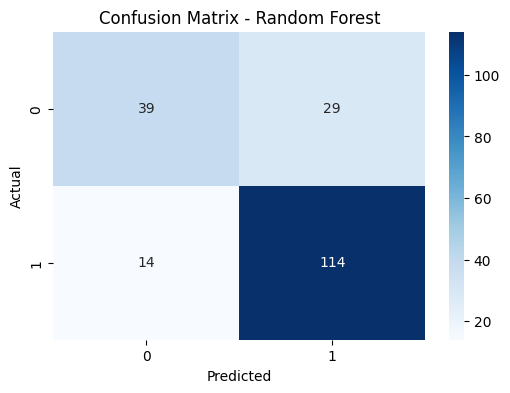

In [31]:
# 10: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


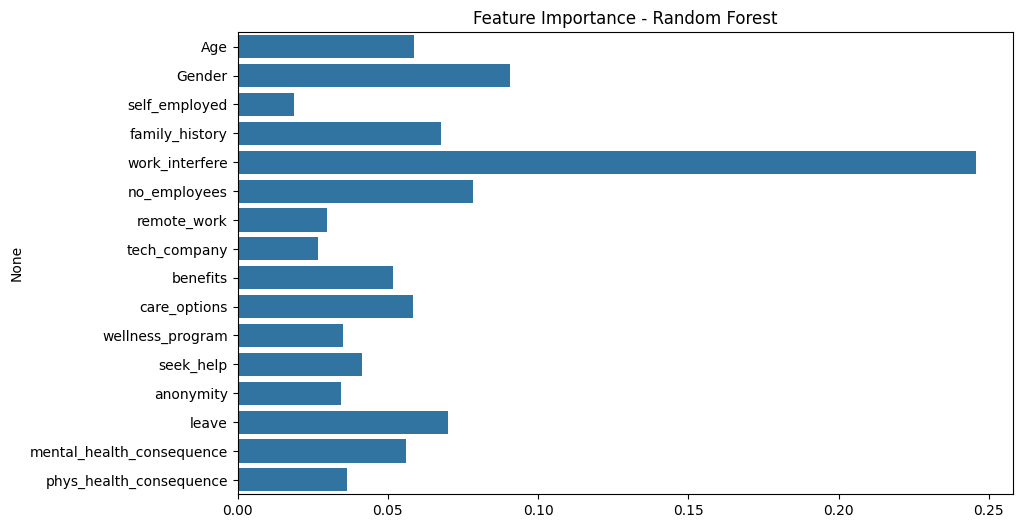

In [32]:
# 11: Plot feature importances
feature_importances = rfc.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()
